In [104]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
mat_content = sio.loadmat( 'face(1).mat' )

In [105]:
face_data = mat_content[ 'X' ]
face_id   = mat_content[ 'l' ]
print( face_data.shape )

type( face_id )

(2576, 520)


numpy.ndarray

### Splitting into Training and Test Sets
If the number of values belonging to each class are unbalanced, stratified sampling is a good thing, since it keeps the class proportions in the training and test sets from the whole dataset.

For this dataset, we have 520 images, but 52 faces. Each identity has 10 images, so we have balanced classes. As such, a purely random shuffle should give a fair test and train split.

From StackOverflow: Stratified Sampling Necessary?

In [106]:
#split training and test data use sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split( face_data.T, test_size = 0.2, random_state = 42 )
train_set = train_set.T
test_set  = test_set.T

print( 'Train Set: {}, Percentage: {} %'.format( train_set.shape, 100*train_set.shape[1] / face_data.shape[ 1 ] ) )
print( 'Test  Set: {}, Percentage: {} %'.format( test_set.shape, 100*test_set.shape[1] / face_data.shape[ 1 ]) )

Train Set: (2576, 416), Percentage: 80.0 %
Test  Set: (2576, 104), Percentage: 20.0 %


### Applying PCA
We dont actually need class labels for PCA analysis, so we can use the train_set data set instead of the faceDataLabeled data set.

#### Calculate d-dimensional mean vector
We have 2576 dimensions, need to calculate the mean for each dimension to get the mean face.

In [107]:
train_set.shape

(2576, 416)

(2576,)


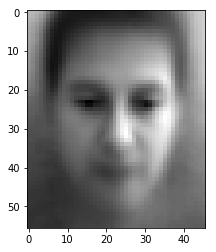

In [108]:
mean_face = np.mean( train_set, axis = 1) 
print(mean_face.shape)
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

In [109]:
#subtract the mean face
phi_mat = train_set.astype( 'float64' )
print(phi_mat.shape)
for j in range(phi_mat.shape[1]):
    for i in range(phi_mat.shape[0]):
        phi_mat[i,j] = phi_mat[i,j] - mean_face[i]

(2576, 416)


In [110]:
A = phi_mat
print(A.shape)
#covirance matrix S
S = 1/A.shape[1] * np.dot(A,A.T)

(2576, 416)


In [111]:
eig_val, eig_vec = np.linalg.eig( S )

In [112]:
eig_vec[ 0 ].shape

(2576,)

In [113]:
eig_pairs = [ ( np.abs( eig_val[ i ] ), eig_vec[ :, i ] ) for i in range( len( eig_val ) ) ]
eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in range(10):
    print( eig_pairs[ i ][0] )

925024.7089041435
532530.6315193939
448877.84661689255
263240.3912907216
223404.15014935477
141717.61246414433
132692.99285091058
116053.13020208266
99239.42387783821
81012.58698773157


In [114]:
#M largerst eigen pairs
M_eig_pairs = []
for i in eig_pairs:
    if( i[ 0 ] > 1 ):
        M_eig_pairs.append( i )
print( 'Original Eig_Pairs: {}'.format( len( eig_pairs ) ) )
print( 'Reduced Eig_Pairs: {}'.format( len( M_eig_pairs ) ) )

Original Eig_Pairs: 2576
Reduced Eig_Pairs: 415


In [115]:
M_eig_pairs[ 0 ][ 1 ]

# eig_face_img = eig_face.reshape( 46, 56 )
# plt.imshow( eig_face_img.T, cmap = 'gist_gray' )

array([ 0.01326336+0.j,  0.014329  +0.j,  0.0149903 +0.j, ...,
       -0.00311901+0.j, -0.00294199+0.j, -0.00324892+0.j])

In [ ]:
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_vector      = M_eig_pairs[ i ][ 1 ]
    eigen_vector_real = eigen_vector.real
    eigen_face_img    = np.reshape( eigen_vector_real, ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q1HD.png")

# LOW DIMENSION PCA

In [117]:
#covirance matrix S
S_LD = 1/A.shape[1] * np.matmul(A.T,A)
LD_EigVal, LD_EigVec = np.linalg.eig( S_LD )

In [118]:
LD_eig_pairs = [ (np.abs( LD_EigVal[ i ] ), LD_EigVec[ :, i ] ) for i in range( len( LD_EigVal ) ) ]
LD_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

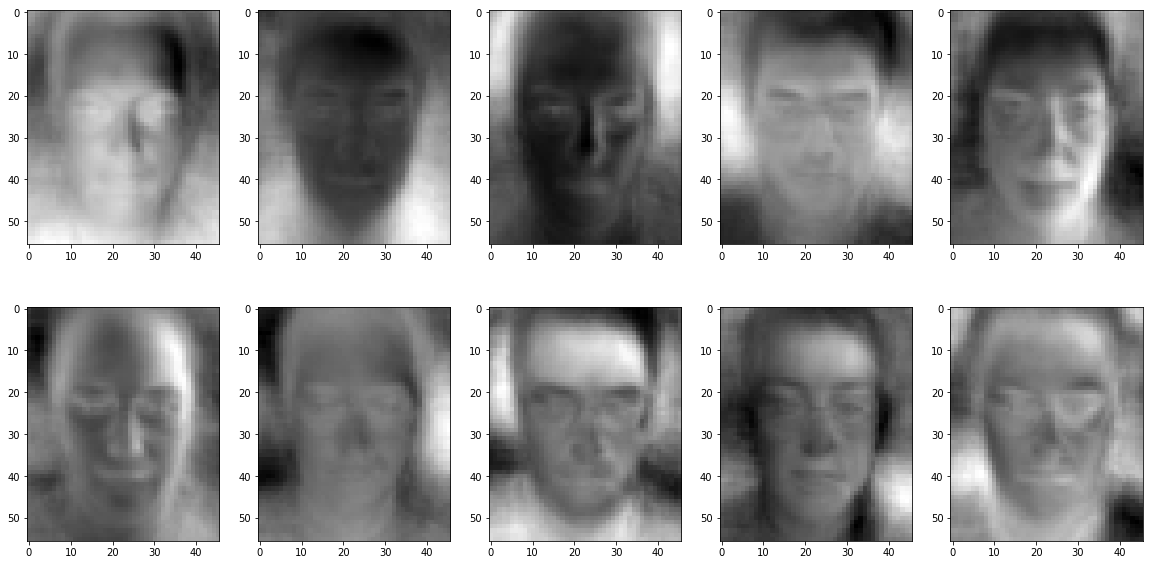

In [119]:
fig = plt.figure( figsize = ( 20, 10 ) )
for i in range( 10 ):
    eigen_vector      = LD_eig_pairs[ i ][ 1 ]
    eigen_vector_real = eigen_vector.real
    norm = np.linalg.norm( eigen_vector_real )
    eigen_face = eigen_vector_real / norm
    eigen_face_img  = np.reshape(np.dot(A,eigen_face), ( 46, 56 ) )
#     print( eigen_face / norm )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
plt.show()
fig.savefig("Q1LD.png")

In [120]:
np.dot( A, LD_eig_pairs[ 0 ][ 0 ] )

array([[-7.46468257e+06,  1.05388332e+08,  1.10938480e+08, ...,
        -2.31901026e+07, -4.68960844e+06,  9.15129613e+07],
       [ 5.30332676e+06,  1.14456242e+08,  9.96558471e+07, ...,
        -2.05973651e+07, -3.02189562e+06,  6.54299328e+07],
       [ 1.84226676e+07,  1.13700213e+08,  7.85492737e+07, ...,
        -1.85783208e+07, -4.70295014e+06,  9.17242049e+06],
       ...,
       [-3.45372206e+07,  5.33401267e+07, -4.28624430e+07, ...,
        -3.26871712e+07, -3.63872700e+07, -5.95128878e+07],
       [-3.18644329e+07,  5.50878898e+07, -4.01896553e+07, ...,
        -3.00143835e+07, -3.92646306e+07, -5.77651247e+07],
       [-3.13240939e+07,  4.73030063e+07, -4.05743410e+07, ...,
        -3.22491186e+07, -3.40991681e+07, -6.09248846e+07]])

In [121]:
LD_eig_pairs[ 0 ][ 1 ][ 0 ]

-0.007448731482529945

In [128]:
lst = []
ld_eig_vecs_sign = []

for i in range( len( LD_eig_pairs ) - 1 ):
    lst.append( np.dot(A, LD_eig_pairs[ i ][ 1 ] ) )

for i in range( len( lst ) - 1 ):
    if( M_eig_pairs[ i ][ 1 ][ 0 ] < 0 and lst[ i ][ 0 ] > 0 ):
        ld_eig_vecs_sign.append( -1*lst[ i ] ) 
    elif( M_eig_pairs[ i ][ 1 ][ 0 ] > 0 and lst[ i ][ 0 ] < 0):
        ld_eig_vecs_sign.append( -1*lst[ i ] )
    else:
        ld_eig_vecs_sign.append( lst[ i ] )
        
ld_eig_vecs_sign

[array([260.18180359, 281.085983  , 294.05838133, ..., -61.18430193,
        -57.71180548, -63.73269401]),
 array([-151.87925055, -134.64124384, -100.68439588, ...,  693.50534556,
         691.54476196,  698.37060837]),
 array([ 283.27280886,  306.854785  ,  344.36870762, ..., -176.11124227,
        -177.60177353, -208.36893869]),
 array([  38.18372709,    0.38847895,  -21.59887938, ..., -310.39058654,
        -362.37806379, -372.91719328]),
 array([-29.41204294, -18.23813815, -32.90581723, ...,  24.17134287,
         11.35617954,  -6.15526292]),
 array([-234.59432768, -271.54592275, -297.81159321, ...,   74.34749662,
          86.04221398,  112.69146938]),
 array([291.82707657, 320.90449068, 342.25577953, ...,   7.95885478,
        -24.87509794, -40.1299154 ]),
 array([ -72.63962938,  -94.45800646, -121.59697718, ...,   95.03903732,
         128.8149408 ,  139.35050019]),
 array([ 90.36946644,  99.9320065 , 113.61044066, ..., 207.39427043,
        159.70895441, 123.20773831]),
 array(

In [129]:
ld_eig_vecs_sign[ 0 ]

norm = np.linalg.norm( ld_eig_vecs_sign[ 0 ] )

normalized = ld_eig_vecs_sign[ 0 ] / norm

normalized.shape

(2576,)

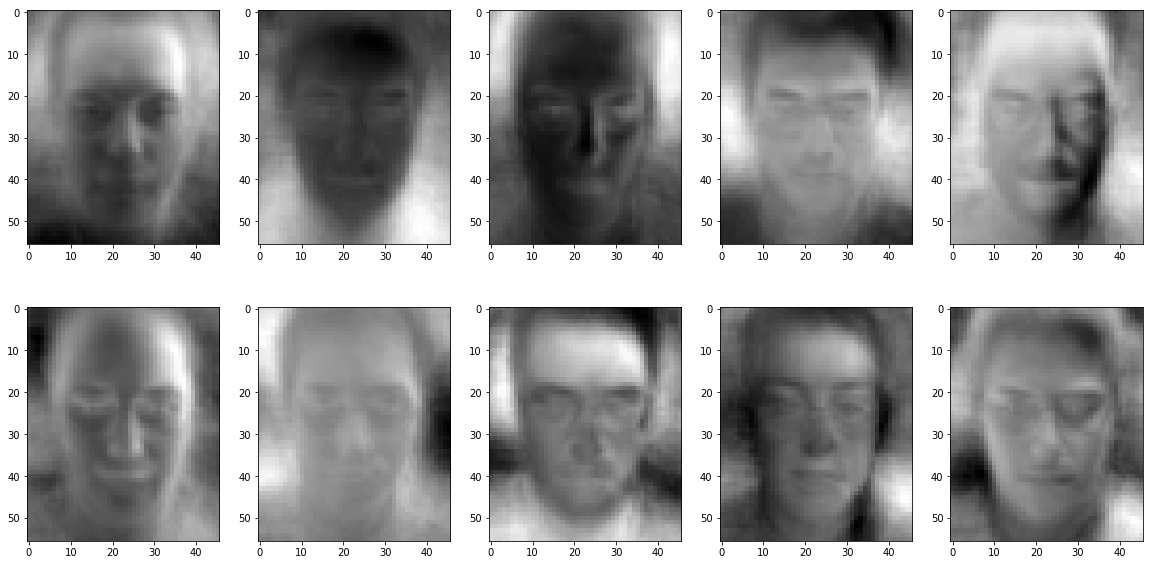

In [130]:
fig = plt.figure( figsize = ( 20, 10 ) )
for i in range( 10 ):
    eigen_vector      = ld_eig_vecs_sign[ i ]
    eigen_vector_real = eigen_vector.real
    norm = np.linalg.norm( eigen_vector_real )
    eigen_face = eigen_vector_real / norm
    eigen_face_img  = np.reshape( eigen_face, ( 46, 56 ) )
#     print( eigen_face / norm )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
plt.show()
fig.savefig("Q1LD.png")

___
# Question2
recontruction of the face using low-dimensional PCA, varing the number of M 

In [125]:
28e+07],
       [ 1.84226676e+07,  1.13700213e+08,  7.85492737e+07, ...,
        -1.85783208e+07, -4.70295014e+06,  9.17242049e+06],
       ...,
       [-3.45372206e+07,  5.33401267e+07, -4.28624430e+07, ...,
        -3.26871712e+07, -3.63872700e+07, -5.95128878e+07],
       [-3.18644329e+07,  5.50878898e+07, -4.01896553e+07, ...,
        -3.00143835e+07, -3.92646306e+07, -5.77651247e+07],
       [-3.13240939e+07,  4.73030063e+07, -4.05743410e+07, ...,
        -3.22491186e+07, -3.40991681e+07, -6.09248846e+07]])

LD_eig_pairs:
ld_eig_vecs_sign = []
​
for i in LD_eig_pairs:

for i in range(len(LD_eig_pairs)):
    for j in range(LD_eig_pairs)
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-77-17132334cda3> in <module>
      1 for i in LD_eig_pairs:
----> 2     i[ 1 ] = np.dot( A, i[ 1 ] )

TypeError: 'tuple' object does not support item assignment

Question2
recontruction of the face using low-dimensional PCA, varing the number of M


A.shape
A.shape

SyntaxError: invalid syntax (<ipython-input-125-5e7cac8b806a>, line 1)

In [ ]:
#number of face
N_Face = 1
phi = A[  : , N_Face-1 ]

phi.shape

plt.figure( 1 )
plt.imshow( phi.reshape( 46, 56 ).T, cmap = 'gist_gray' )
plt.show()

plt.figure(2)
plt.imshow( train_set[ :, N_Face-1 ].reshape( 46, 56 ).T, cmap = 'gist_gray' )
plt.show()

In [ ]:
#Choose M largest Eigenface
M = 200
pca_base = np.array( [ np.dot( A, LD_eig_pairs[ i ][ 1 ] ) for i in range( M ) ] )
# pca_base = np.array( [ M_eig_pairs[i][1] for i in range( M ) ] )
print(pca_base.shape)


phi = phi.reshape( 2576, 1 )
print(phi.T.shape)

face_projection = np.dot( phi.T, pca_base.T )
print(face_projection.shape)

### Image reconstruction

In [ ]:
face_reconstructed = mean_face + np.dot( face_projection, pca_base )
print(face_reconstructed.real)
face_reconstructed = face_reconstructed.real
face = face_reconstructed.reshape( 46, 56)
plt.imshow( face.T, cmap = 'gist_gray' )